# Data_Pyrates_Extra_Questions_And_Solutions 

In [4]:
#import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for visualisation
import datetime as DT
import io
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#### 1.Visualize a colour map showing the ranges of 'ExpectedLOS' and 'ExpectedMortality'.

C:\Users\rajee\AppData\Local\Temp\ipykernel_25964\1292129627.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=los_df, y=m_df,alpha=0.5, cmap='viridis')


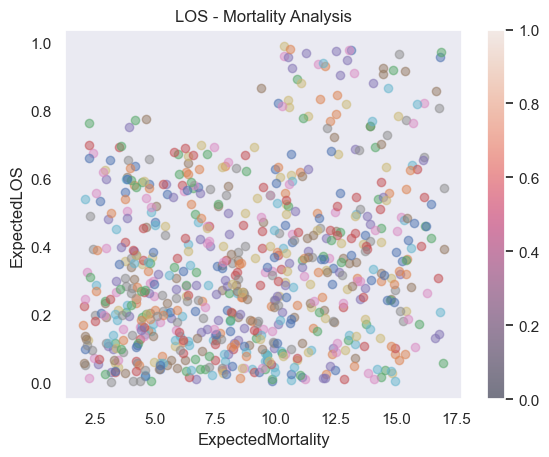

In [99]:
#1.Visualize a colour map showing the ranges of 'ExpectedLOS' and 'ExpectedMortality'.
#Add set tranparency as '0.5'for better visualiztion.


import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("HospitalDatabase.xlsx","Discharges",usecols=['ExpectedLOS','ExpectedMortality'])

for i in range(len(df)):
    los_df =df.loc[i,'ExpectedLOS']
    m_df =df.loc[i,'ExpectedMortality']
    plt.scatter(x=los_df, y=m_df,alpha=0.5, cmap='viridis')
plt.xlabel("ExpectedMortality")
plt.ylabel("ExpectedLOS")
plt.title("LOS - Mortality Analysis",loc='center')
plt.colorbar()
plt.show()

#### 2.Which Service has maximum Actual Length of stay.

In [80]:
#Which Service has maximum Actual Length of stay.

df =pd.read_excel("HospitalDatabase.xlsx","Discharges")

#insert new column 'ActualLOS' to 'Discharges' sheet.
df.insert(8,"ActualLOS",(df['DischargeDate'] - df['AdmissionDate']) / np.timedelta64(1, 'D'))

g1 = df.groupby(['Service'])
#print(df_final.to_string())

icu = g1.get_group('ICU')
neurology = g1.get_group('Neurology')
hospitalist = g1.get_group('Hospitalist')
orthopeadics = g1.get_group('Orthopeadics')
cardiology = g1.get_group('Cardiology')
general_medicine = g1.get_group('General Medicine')

Nuerology_Loc_mean = neurology['ActualLOS'].mean()
Hospitalist_Loc_mean = hospitalist['ActualLOS'].mean()
Orthopeadics_Loc_mean = orthopeadics['ActualLOS'].mean()
Cardiology_Loc_mean = cardiology['ActualLOS'].mean()
General_Medicine_Loc_mean = general_medicine['ActualLOS'].mean()
Icu_Loc_mean = icu['ActualLOS'].mean()

data1 = {
  "Service": ["Cardiology","ICU","Neurology","Hospitalist","Orthopeadics","General Medicine"],
  "Actual LOS": [Cardiology_Loc_mean,Icu_Loc_mean,Nuerology_Loc_mean ,Hospitalist_Loc_mean ,Orthopeadics_Loc_mean,General_Medicine_Loc_mean]
}

df1 = pd.DataFrame(data1)
print("Actual LOS based on Service:\n\n") 
print(df1)

print("\n\nService which has maximum Actual Length of stay:\n")

x = df1.max()['Actual LOS']
maximum =df1.loc[ df1['Actual LOS']== x]
print(maximum)

Actual LOS based on Service:


            Service  Actual LOS
0        Cardiology   10.491652
1               ICU    9.609315
2         Neurology   10.161249
3       Hospitalist    9.619537
4      Orthopeadics    9.819417
5  General Medicine   10.254865


Service which has maximum Actual Length of stay:

      Service  Actual LOS
0  Cardiology   10.491652


#### 3. Violin plot for' Discharge Disposition Analysis' based on gender.

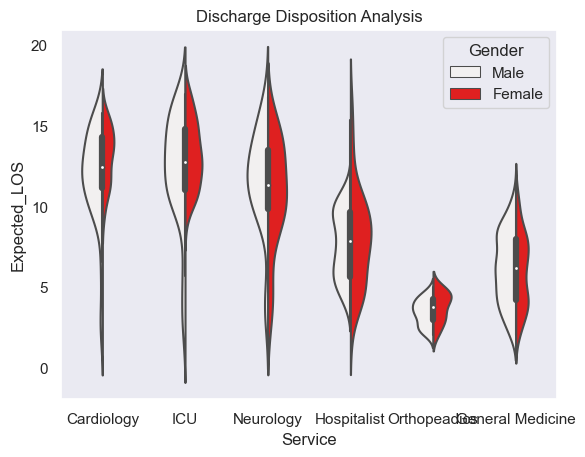

In [83]:
# load data into a dataframe
df1 = pd.read_excel("HospitalDatabase.xlsx","Discharges",usecols=['PatientID','Service','ExpectedLOS','DischargeDisposition']) 
df2 = pd.read_excel("HospitalDatabase.xlsx","Patients",usecols=['Gender'])
# contact() : Adding the columns from one Dataframe to those of another Dataframe
df = pd.concat([df1,df2], axis = 1)
# use to set style of background of plot
sns.set(style="dark")

sns.violinplot(data=df,x='Service',y='ExpectedLOS',hue='Gender',split=True,width=0.5,color="Red",scale='count',Legend=True)

plt.xlabel("Service")
plt.ylabel("Expected_LOS")
plt.title("Discharge Disposition Analysis",loc='center')
plt.show()


#### 4. Display the statistical properties andTo plot a Bar chart for Systolic and Diastolic Blood Pressure. 


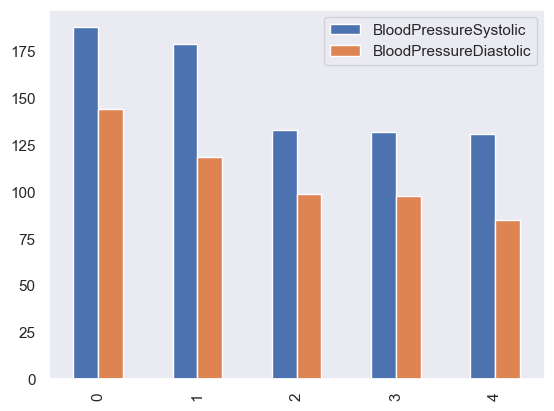

       BloodPressureSystolic  BloodPressureDiastolic
count             826.000000              826.000000
mean              155.815981              106.841232
std                20.508743               23.219744
min               120.000000               51.695653
25%               137.000000               88.066185
50%               156.000000              107.460231
75%               174.000000              123.740114
max               190.000000              157.296683


In [97]:
df =pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits",usecols=[ 'BloodPressureSystolic','BloodPressureDiastolic'])
df.head().plot(kind="bar") #If you want bar chart
plt.show()
print(df.describe())

#### 5.Visualize Visit analysis[Analyse each patients visit with Pulse,Acuity based on visit type and disposition] of patients using implot. 

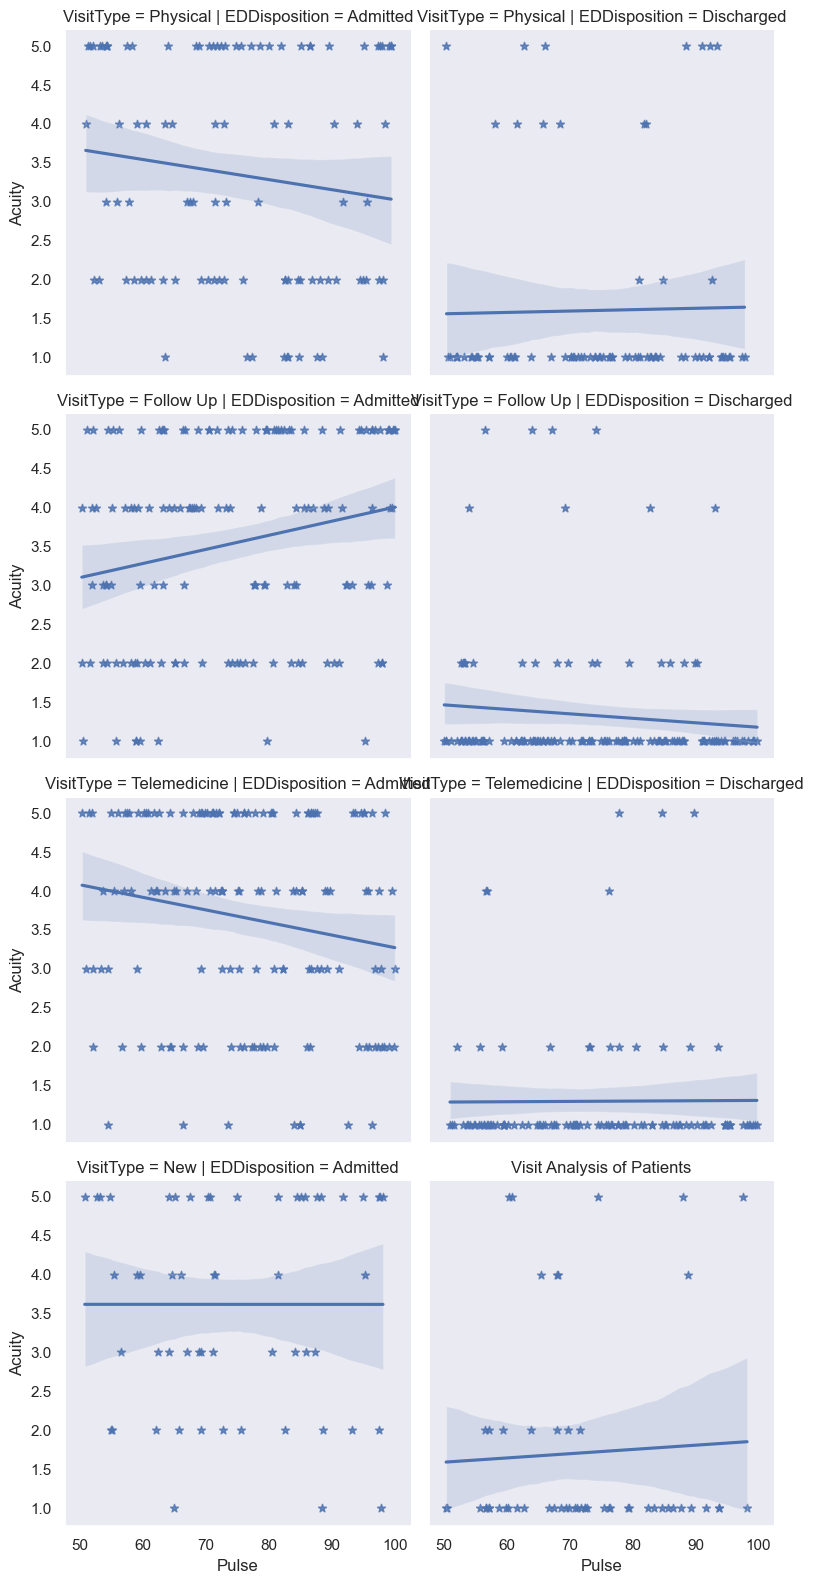

In [100]:
# load data into a dataframe
df_visit = pd.read_excel("HospitalDatabase.xlsx","EDVisits",usecols=['PatientID','ReasonForVisit','Acuity','EDDisposition']) 
df2_type = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits",usecols=['VisitType','Pulse','VisitStatus'])

# contact() : Adding the columns from one Dataframe to those of another Dataframe
df_analyze = pd.concat([df_visit,df2_type], axis = 1)

# use to set style of background of plot
#sns.set(style="whitegrid")

sns.lmplot(data=df_analyze,y='Acuity', x='Pulse', col='EDDisposition', row='VisitType',markers='*',height=4)

plt.xlabel("Pulse")
plt.ylabel("Acuity")
plt.title("Visit Analysis of Patients",loc='center')
plt.show()


# END